<a href="https://colab.research.google.com/github/Dhruv-Dubey/CKD_Detection/blob/main/CKD_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
df=pd.read_csv("kidney_disease.csv")


In [ ]:
df["classification"]=df["classification"].replace({"ckd":1,"notckd":0})
print(df.head())

   id   age    bp     sg   al   su     rbc        pc         pcc          ba  \
0   0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2   2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3   3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4   4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

   ...  pcv    wc   rc  htn   dm  cad appet   pe  ane classification  
0  ...   44  7800  5.2  yes  yes   no  good   no   no              1  
1  ...   38  6000  NaN   no   no   no  good   no   no              1  
2  ...   31  7500  NaN   no  yes   no  poor   no  yes              1  
3  ...   32  6700  3.9  yes   no   no  poor  yes  yes              1  
4  ...   35  7300  4.6   no   no   no  good   no   no              1  

[5 rows x 26 columns]


#Data pre-processing

In [ ]:
df.shape

(400, 26)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [ ]:
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [ ]:
df.isnull().sum()/df.shape[0]*100  #percentage pf missing values

id                 0.00
age                2.25
bp                 3.00
sg                11.75
al                11.50
su                12.25
rbc               38.00
pc                16.25
pcc                1.00
ba                 1.00
bgr               11.00
bu                 4.75
sc                 4.25
sod               21.75
pot               22.00
hemo              13.00
pcv               17.50
wc                26.25
rc                32.50
htn                0.50
dm                 0.50
cad                0.50
appet              0.25
pe                 0.25
ane                0.25
classification     0.00
dtype: float64

In [ ]:
df.duplicated().sum()

0

In [ ]:
for i in df.select_dtypes(include="object"):
    print(df[i].value_counts())
    print("###"*10)

    #Finding garbage value

rbc
normal      201
abnormal     47
Name: count, dtype: int64
##############################
pc
normal      259
abnormal     76
Name: count, dtype: int64
##############################
pcc
notpresent    354
present        42
Name: count, dtype: int64
##############################
ba
notpresent    374
present        22
Name: count, dtype: int64
##############################
pcv
41      21
52      21
44      19
48      19
40      16
43      14
42      13
45      13
32      12
36      12
33      12
50      12
28      12
34      11
37      11
30       9
29       9
35       9
46       9
31       8
24       7
39       7
26       6
38       5
53       4
51       4
49       4
47       4
54       4
25       3
27       3
22       3
19       2
23       2
15       1
21       1
17       1
20       1
\t43     1
18       1
9        1
14       1
\t?      1
16       1
Name: count, dtype: int64
##############################
wc
9800     11
6700     10
9200      9
9600      9
7200      9
         ..
19

In [ ]:
df['pcv']=df['pcv'].str.replace("\t", "").replace("?",np.nan).astype(float)
df['wc']=df['wc'].str.replace("\t", "").replace("?",np.nan).astype(float)
df['rc']=df['rc'].str.replace("\t", "").replace("?",np.nan).astype(float)
df['dm']=df['dm'].str.replace("\t", "").replace("?",np.nan)
df['dm']=df['dm'].replace(" yes","yes")
df['cad']=df['cad'].str.replace("\t", "").replace("?",np.nan)
df['classification']=df['classification'].replace("ckd\t",1).astype(int)

#took care pf garbage values

#EDA

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,400.0,199.500000,115.614301,0.000,99.75,199.50,299.25,399.000
age,391.0,51.483376,17.169714,2.000,42.00,55.00,64.50,90.000
bp,388.0,76.469072,13.683637,50.000,70.00,80.00,80.00,180.000
sg,353.0,1.017408,0.005717,1.005,1.01,1.02,1.02,1.025
al,354.0,1.016949,1.352679,0.000,0.00,0.00,2.00,5.000
su,351.0,0.450142,1.099191,0.000,0.00,0.00,0.00,5.000
bgr,356.0,148.036517,79.281714,22.000,99.00,121.00,163.00,490.000
bu,381.0,57.425722,50.503006,1.500,27.00,42.00,66.00,391.000
sc,383.0,3.072454,5.741126,0.400,0.90,1.30,2.80,76.000
sod,313.0,137.528754,10.408752,4.500,135.00,138.00,142.00,163.000


In [ ]:
df.describe(include="object")

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane
count,248,335,396,396,398,398,398,399,399,399
unique,2,2,2,2,2,2,2,2,2,2
top,normal,normal,notpresent,notpresent,no,no,no,good,no,no
freq,201,259,354,374,251,261,364,317,323,339


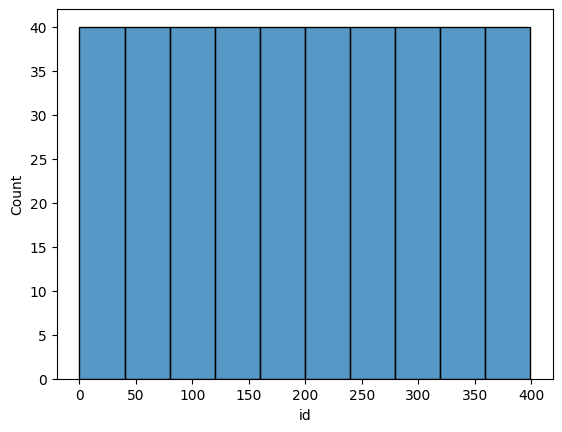

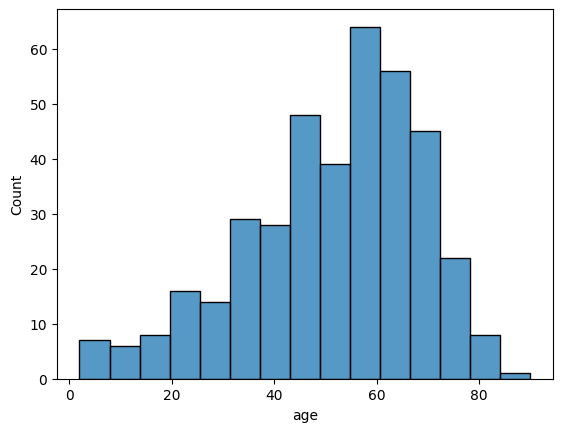

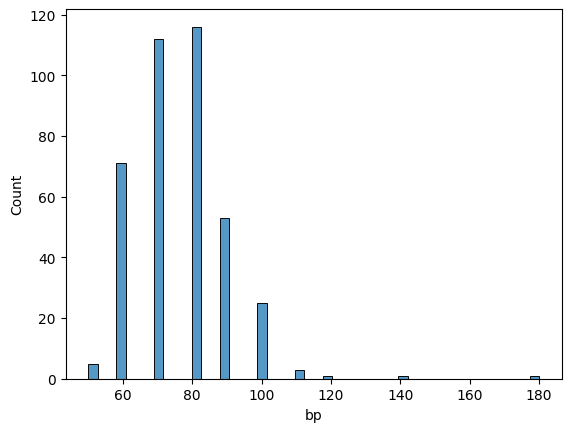

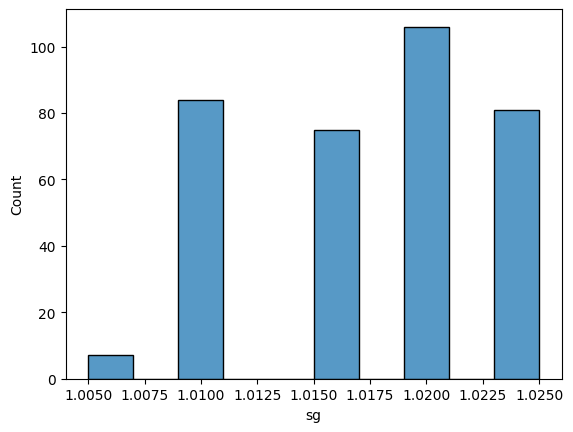

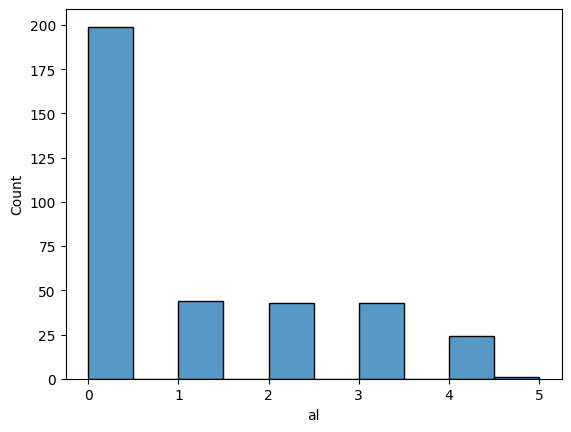

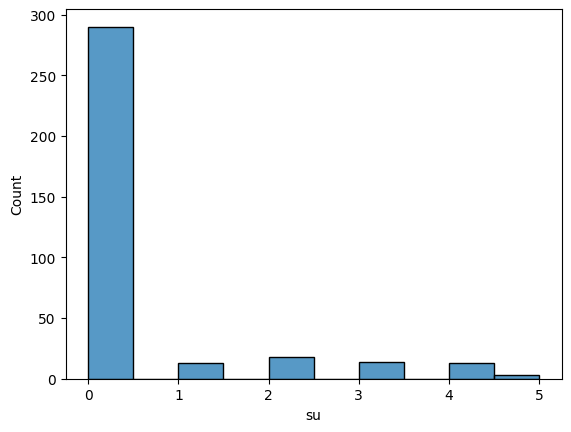

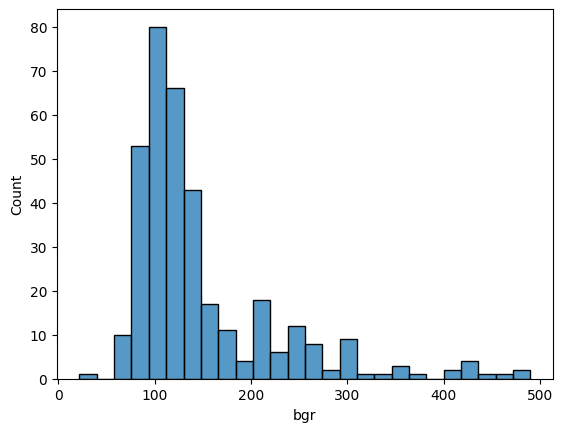

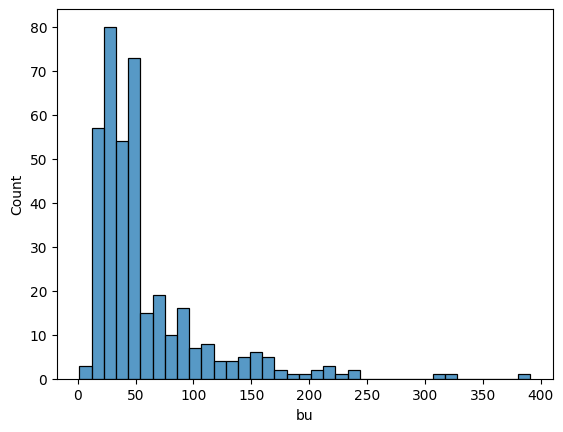

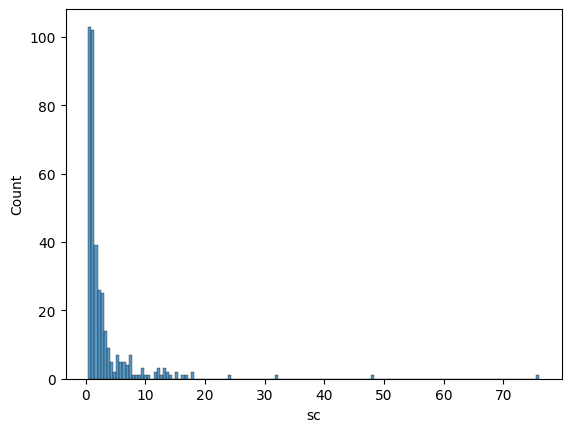

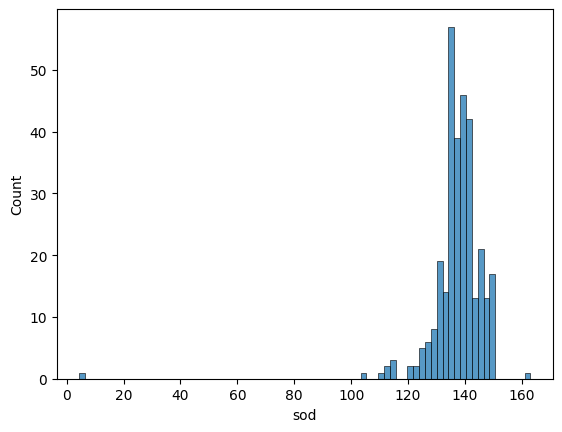

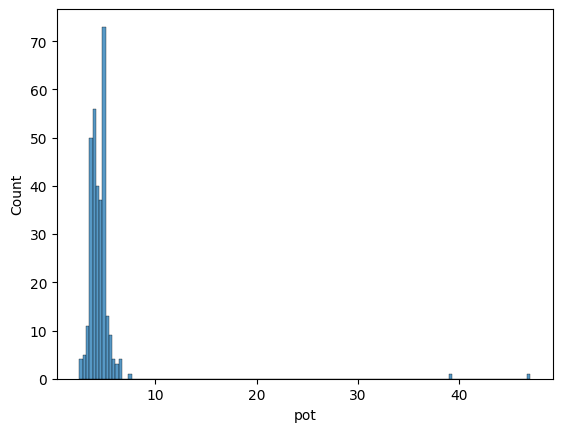

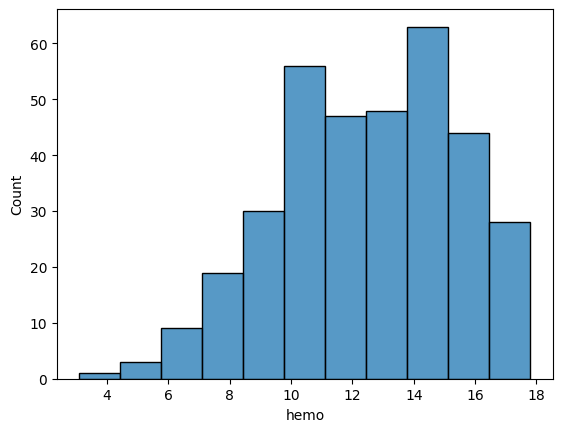

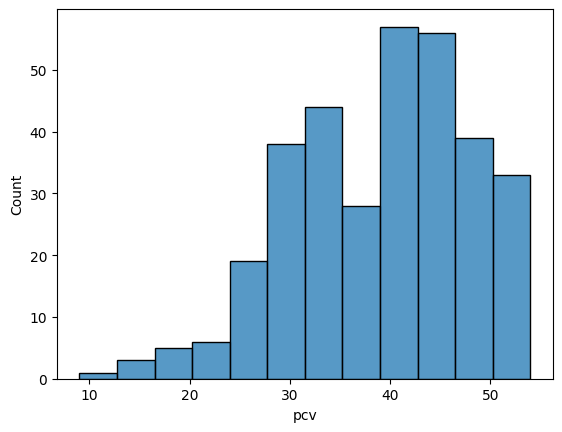

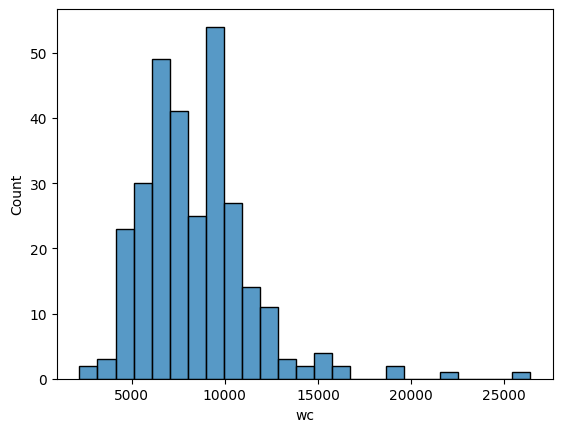

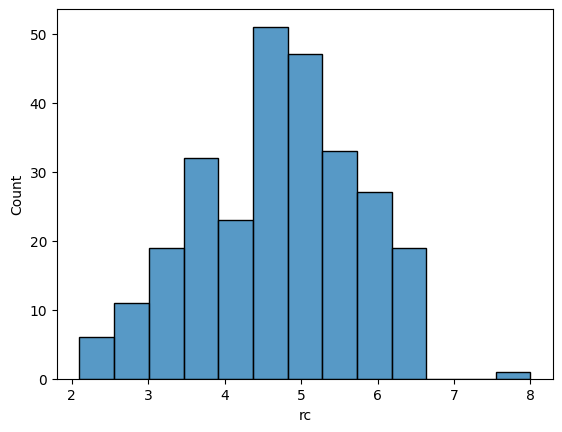

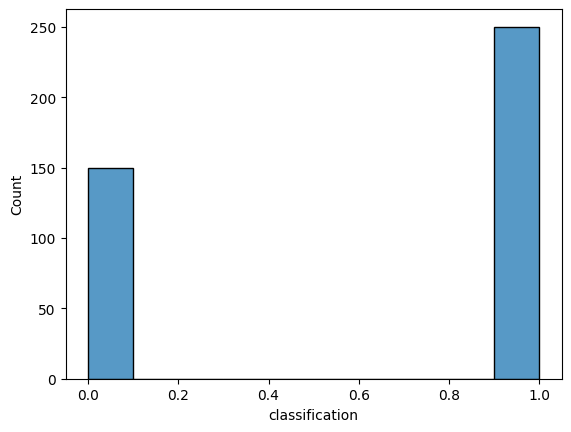

In [ ]:
import warnings
warnings.filterwarnings("ignore")

for i in df.select_dtypes(include="number").columns:
    sns.histplot(data=df, x=i)
    plt.show()

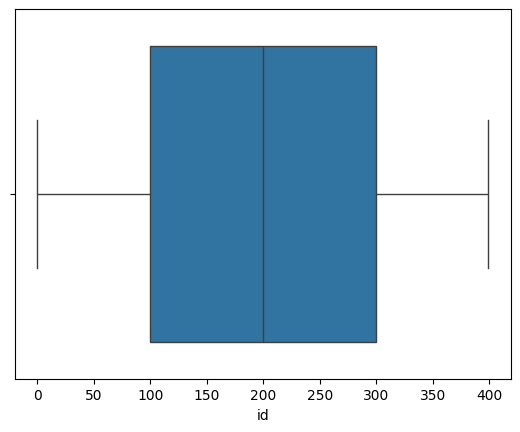

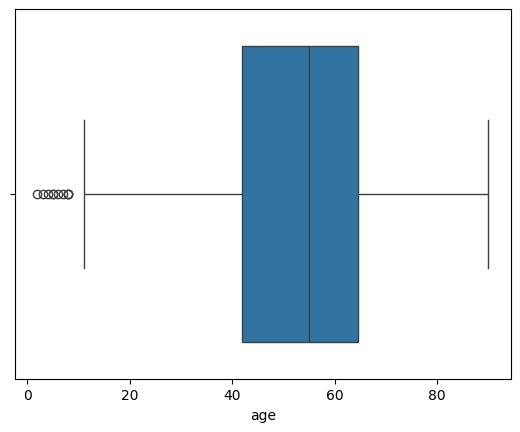

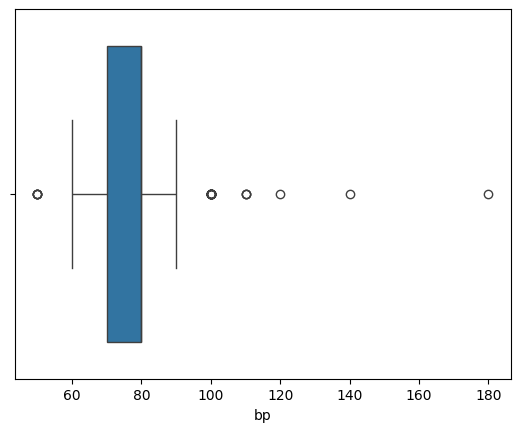

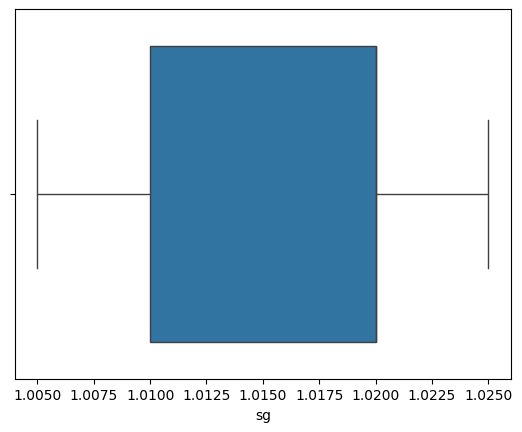

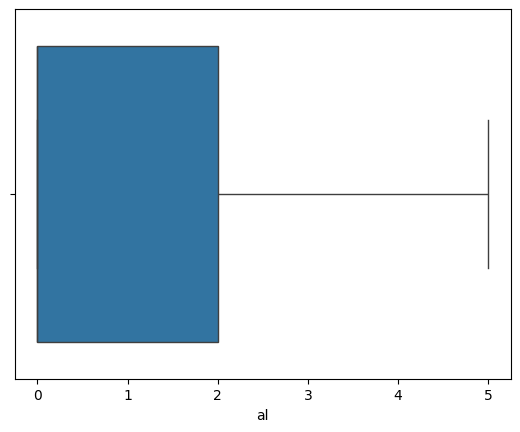

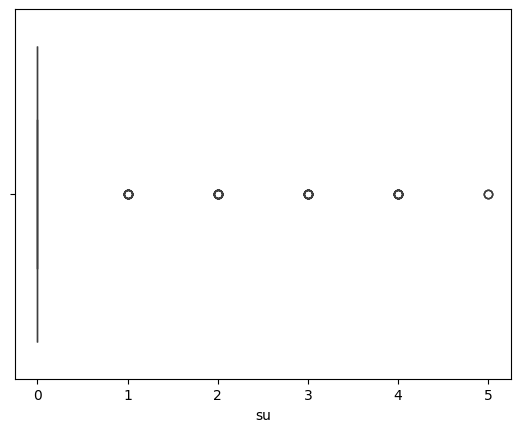

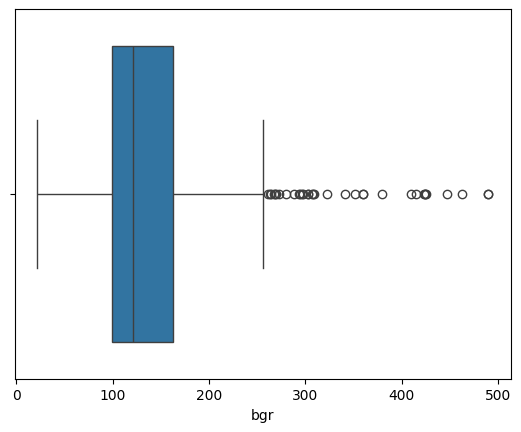

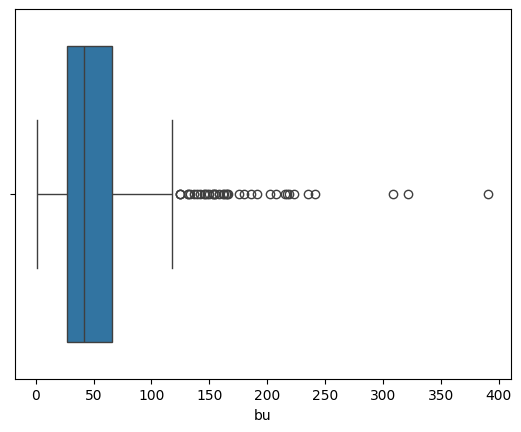

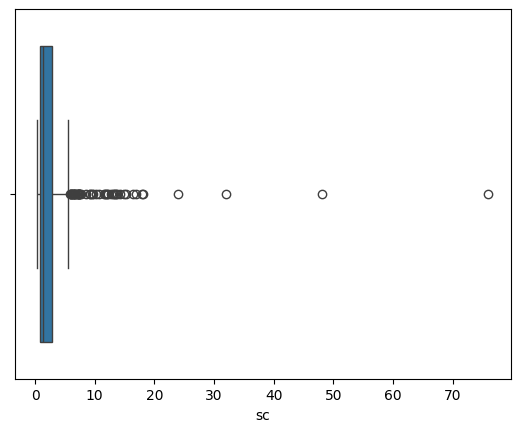

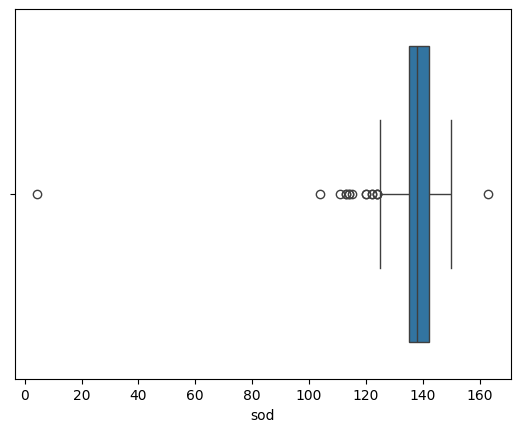

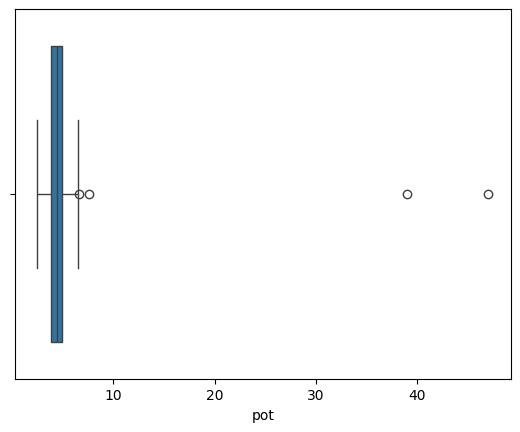

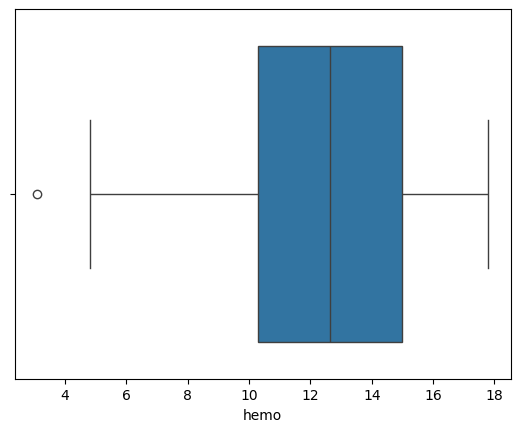

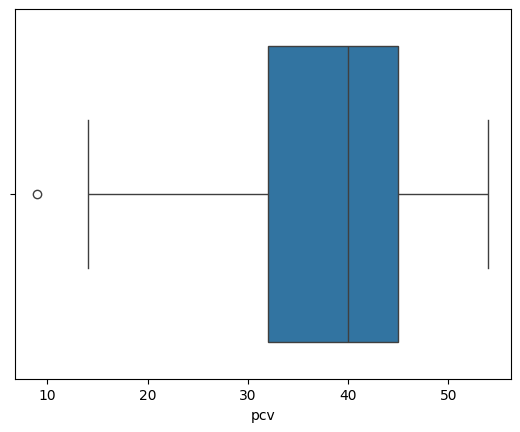

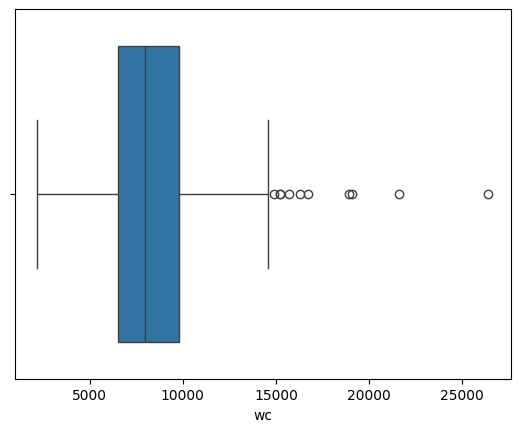

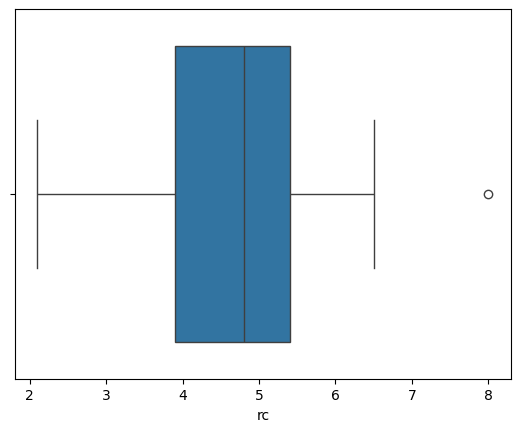

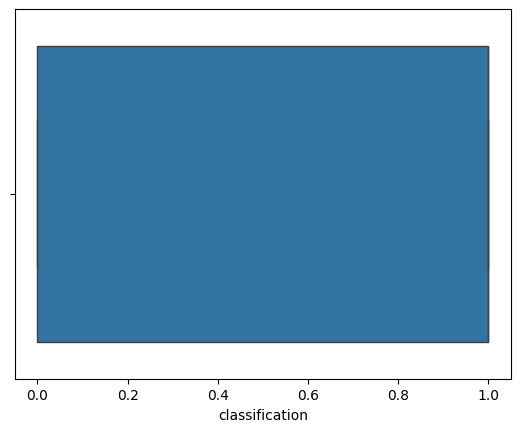

In [ ]:
for i in df.select_dtypes(include="number").columns:
    sns.boxplot(data=df, x=i)
    plt.show()

In [ ]:
df['su']

0      0.0
1      0.0
2      3.0
3      0.0
4      0.0
      ... 
395    0.0
396    0.0
397    0.0
398    0.0
399    0.0
Name: su, Length: 400, dtype: float64

In [ ]:
df.drop('su',axis=1,inplace=True)

In [ ]:
df.select_dtypes(include="number").columns

Index(['id', 'age', 'bp', 'sg', 'al', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo',
       'pcv', 'wc', 'rc', 'classification'],
      dtype='object')

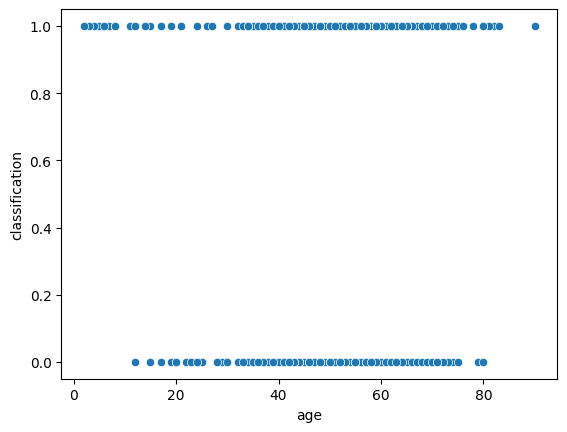

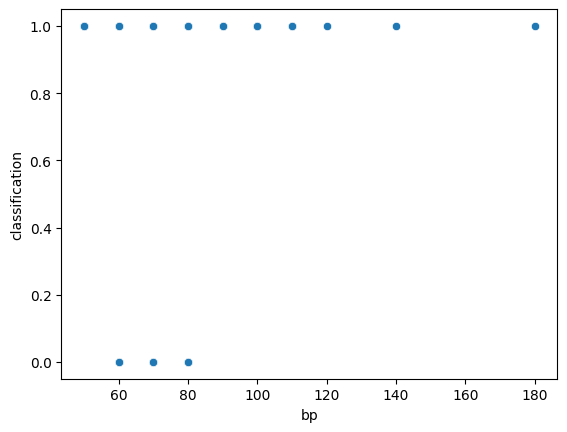

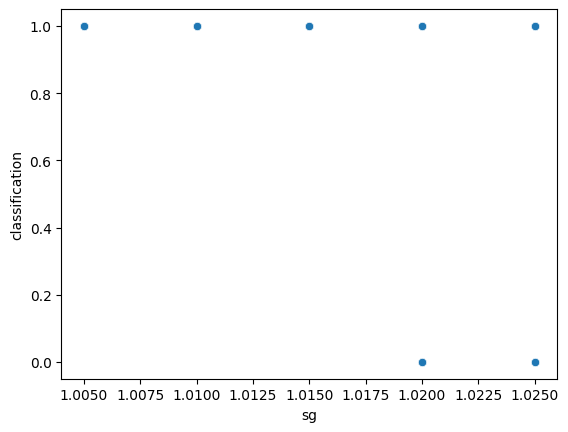

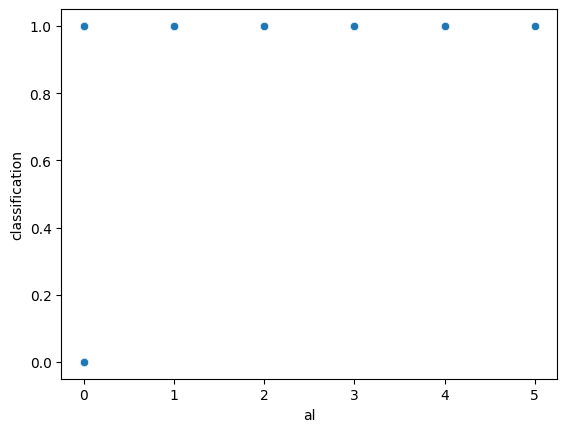

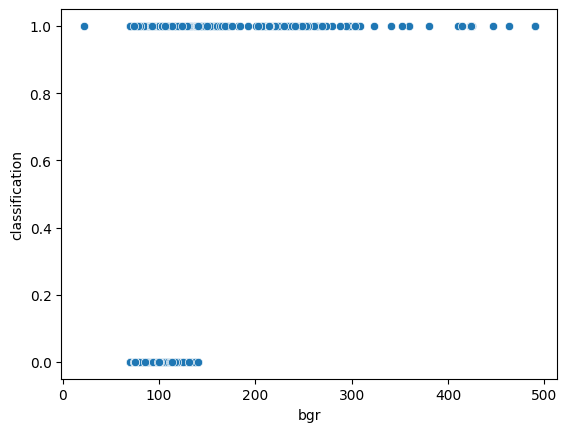

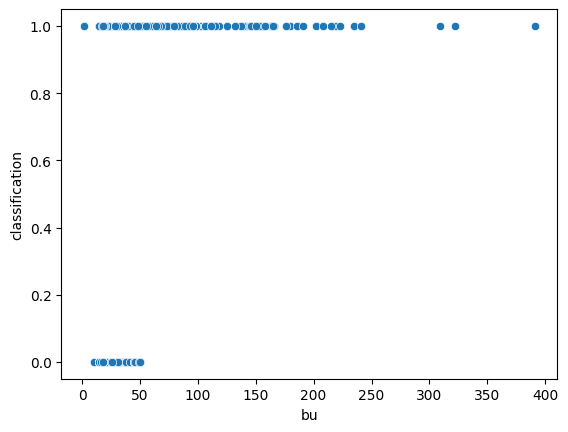

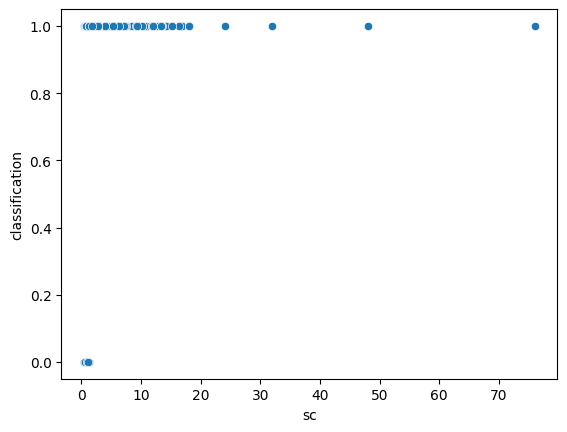

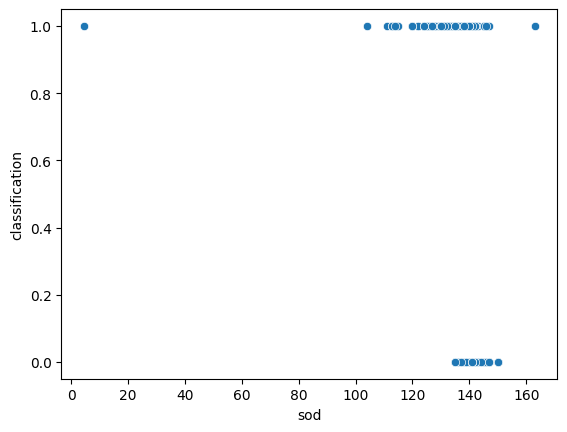

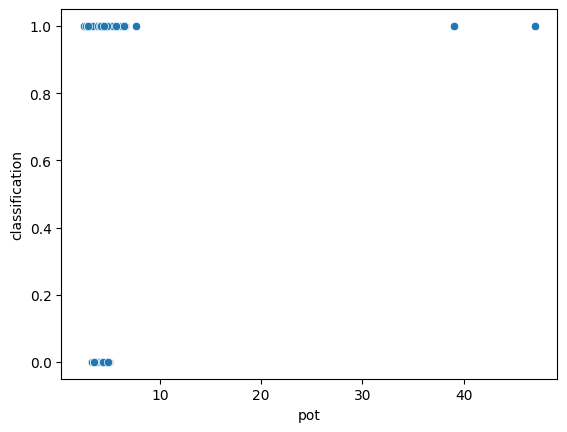

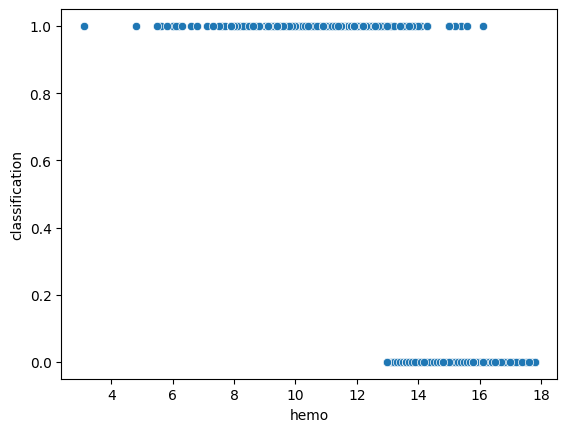

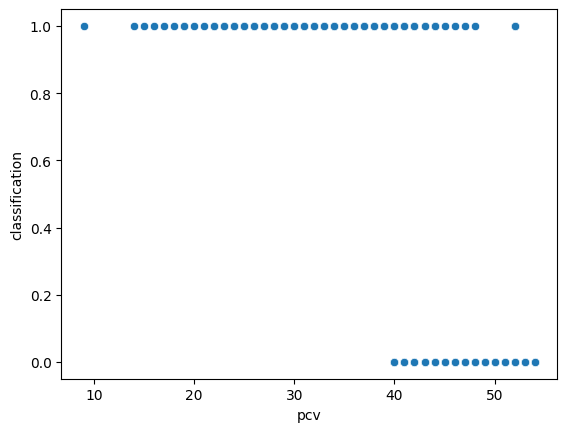

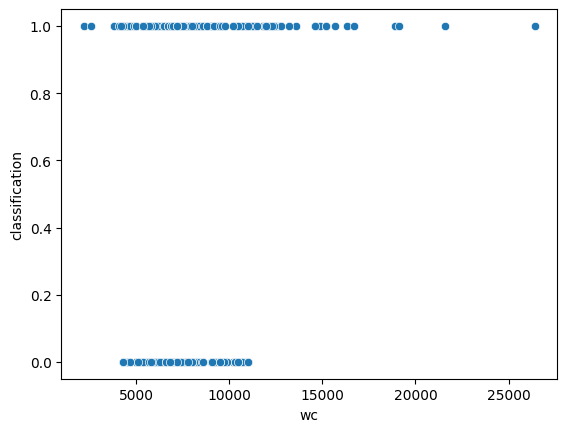

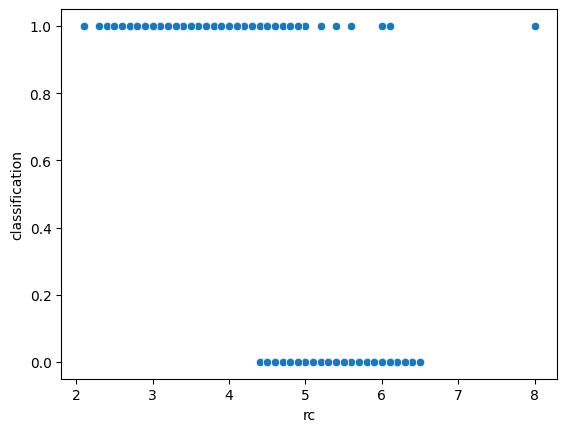

In [ ]:
for i in [ 'age', 'bp', 'sg', 'al', 'bgr', 'bu', 'sc', 'sod', 'pot',
       'hemo', 'pcv', 'wc', 'rc']:
       sns.scatterplot(data=df, x=i, y='classification')
       plt.show()

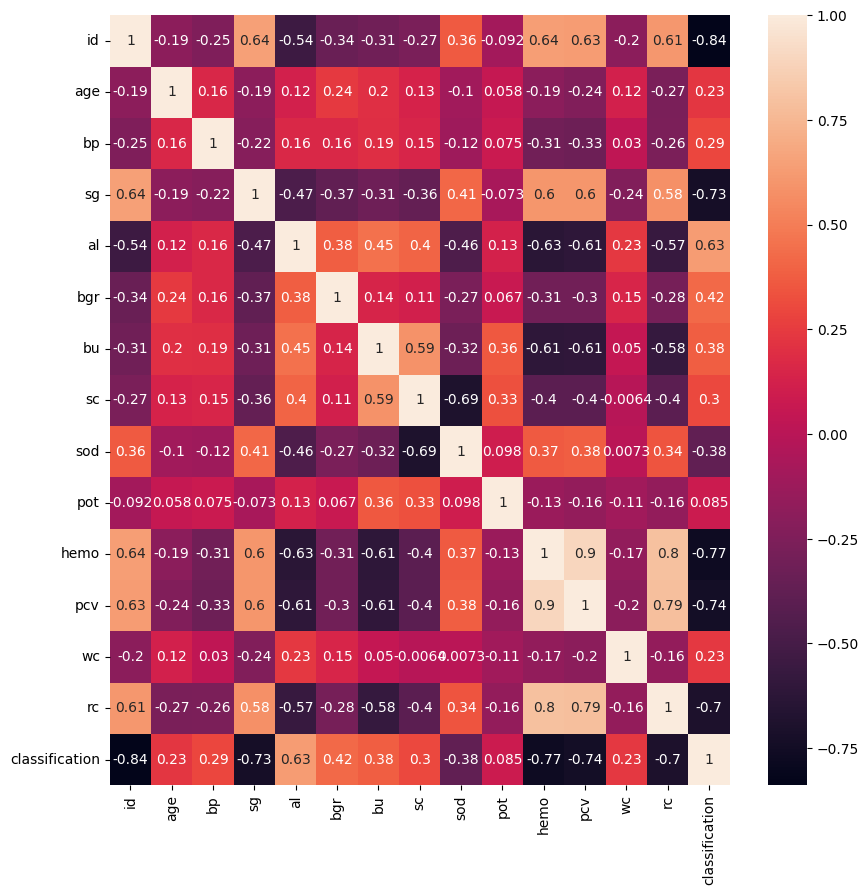

In [ ]:
s=df.select_dtypes(include="number").corr()
plt.figure(figsize=(10,10))
sns.heatmap(s,annot=True)
plt.show()

# Missing value treatment

In [ ]:
df.isnull().sum()

id                  0
age                 9
bp                 12
sg                 47
al                 46
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                71
wc                106
rc                131
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [ ]:
from sklearn.impute import KNNImputer
imputer=KNNImputer()
for i in df.select_dtypes(include="number").columns:
    df[i]=imputer.fit_transform(df[[i]])

def random_value_imputation(feature):
    random_sample = df[feature].dropna().sample(df[feature].isna().sum())
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature] = random_sample

def impute_mode(feature):
    mode = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode)

random_value_imputation("rbc")
random_value_imputation("pc")




impute_mode('htn')
impute_mode('dm')
impute_mode('cad')
impute_mode('appet')
impute_mode('pe')
impute_mode('ane')
impute_mode('pcc')
impute_mode('ba')


#Outlier treatment


In [ ]:
def outlier_treatment(feature):
    Q1,Q3=np.percentile(feature,[25,75])
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

for i in ['pot']:
    lower_bound, upper_bound = outlier_treatment(df[i])
    df[i] = np.where(df[i] < lower_bound, lower_bound, df[i])
    df[i] = np.where(df[i] > upper_bound, upper_bound, df[i])


#encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane']:
    df[col] = le.fit_transform(df[col])
df.head()

,id,age,bp,sg,al,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0.0,48.0,80.0,1.020,1.0,0,1,0,0,121.000000,...,44.0,7800.0,5.200000,1,1,0,0,0,0,1.0
1,1.0,7.0,50.0,1.020,4.0,1,1,0,0,148.036517,...,38.0,6000.0,4.707435,0,0,0,0,0,0,1.0
2,2.0,62.0,80.0,1.010,2.0,1,1,0,0,423.000000,...,31.0,7500.0,4.707435,0,1,0,1,0,1,1.0
3,3.0,48.0,70.0,1.005,4.0,1,0,1,0,117.000000,...,32.0,6700.0,3.900000,1,0,0,1,1,1,1.0
4,4.0,51.0,80.0,1.010,2.0,1,1,0,0,106.000000,...,35.0,7300.0,4.600000,0,0,0,0,0,0,1.0


# Splitting data into test and train


In [ ]:
from sklearn.model_selection import train_test_split
df.drop('id', axis=1, inplace=True)
X = df.drop('classification', axis=1)
y = df['classification']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state =0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(280, 23) (120, 23) (280,) (120,)


#Feature Scaling Standardization


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train[['age', 'bp', 'sg', 'al', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc',
       'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad', 'appet',
       'pe', 'ane']]=scaler.fit_transform(X_train[['age', 'bp', 'sg', 'al', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc',
       'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad', 'appet',
       'pe', 'ane']])


X_test[['age', 'bp', 'sg', 'al', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc',
       'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad', 'appet',
       'pe', 'ane']]=scaler.fit_transform(X_test[['age', 'bp', 'sg', 'al', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu', 'sc',
       'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad', 'appet',
       'pe', 'ane']])


#Models

In [ ]:
# logistic regresion

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))



1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        44
         1.0       1.00      1.00      1.00        76

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

[[44  0]
 [ 0 76]]


In [ ]:
# decision tree

from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifer object
clf1 = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf1 = clf1.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf1.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))



0.9583333333333334
              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95        44
         1.0       1.00      0.93      0.97        76

    accuracy                           0.96       120
   macro avg       0.95      0.97      0.96       120
weighted avg       0.96      0.96      0.96       120

[[44  0]
 [ 5 71]]


In [ ]:
# SVM

from sklearn.svm import SVC
clf = SVC(kernel='linear')

# fitting x samples and y classes
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
a=accuracy_score(y_test, y_pred)
print(f'accuracy: {a*100:.2f}%')
print()
print(classification_report(y_test, y_pred))



accuracy: 100.00%

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        44
         1.0       1.00      1.00      1.00        76

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [ ]:
#Naive Bayes

from sklearn.naive_bayes import GaussianNB


# instantiate the model
gnb = GaussianNB()


# fit the model
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))




0.6333333333333333
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00        44
         1.0       0.63      1.00      0.78        76

    accuracy                           0.63       120
   macro avg       0.32      0.50      0.39       120
weighted avg       0.40      0.63      0.49       120



In [ ]:
# KNN

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 4, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


0.9416666666666667
              precision    recall  f1-score   support

         0.0       0.86      1.00      0.93        44
         1.0       1.00      0.91      0.95        76

    accuracy                           0.94       120
   macro avg       0.93      0.95      0.94       120
weighted avg       0.95      0.94      0.94       120



In [ ]:
# k-means(not good at all)
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 0)
kmeans.fit(X_train)
y_pred = kmeans.predict(X_test)
print(accuracy_score(y_test, y_pred))



0.8583333333333333


In [ ]:
# random forest

from sklearn.ensemble import RandomForestClassifier

rd_clf = RandomForestClassifier(criterion = 'entropy', max_depth = 11, max_features = 'auto', min_samples_leaf = 2, min_samples_split = 3, n_estimators = 130)
rd_clf.fit(X_train, y_train)

y_pred = rd_clf.predict(X_test)

print((accuracy_score(y_test, y_pred)*100))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))



100.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        44
         1.0       1.00      1.00      1.00        76

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

[[44  0]
 [ 0 76]]


In [ ]:
# extra trees
from sklearn.ensemble import ExtraTreesClassifier

et_clf = ExtraTreesClassifier(criterion = 'entropy', max_depth = 11, max_features = 'auto', min_samples_leaf = 2, min_samples_split = 3, n_estimators = 100)

et_clf.fit(X_train, y_train)

y_pred = et_clf.predict(X_test)

print((accuracy_score(y_test, y_pred)*100))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

98.33333333333333
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98        44
         1.0       0.99      0.99      0.99        76

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120

[[43  1]
 [ 1 75]]


In [ ]:
# ada

from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of ada boost

ada_acc = accuracy_score(y_test, ada.predict(X_test))
ada_cm = confusion_matrix(y_test, ada.predict(X_test))
ada_cr = classification_report(y_test, ada.predict(X_test))

print(ada_acc)
print(ada_cm)
print(ada_cr)

1.0
[[44  0]
 [ 0 76]]
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        44
         1.0       1.00      1.00      1.00        76

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [ ]:
# gradient boost

from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of gradient boosting classifier

gb_acc = accuracy_score(y_test, gb.predict(X_test))
gb_cm = confusion_matrix(y_test, gb.predict(X_test))
gb_cr = classification_report(y_test, gb.predict(X_test))

print(gb_acc)
print(gb_cm)
print(gb_cr)

0.9916666666666667
[[44  0]
 [ 1 75]]
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99        44
         1.0       1.00      0.99      0.99        76

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120

